In [611]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [612]:
df_ratings: DataFrame = pd.read_csv("../unprocessed-data/ratings.csv", encoding='utf-8')

df_ratings.head(50)

# Todas as colunas de df_ratings são importantes

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [613]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [614]:
df_ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

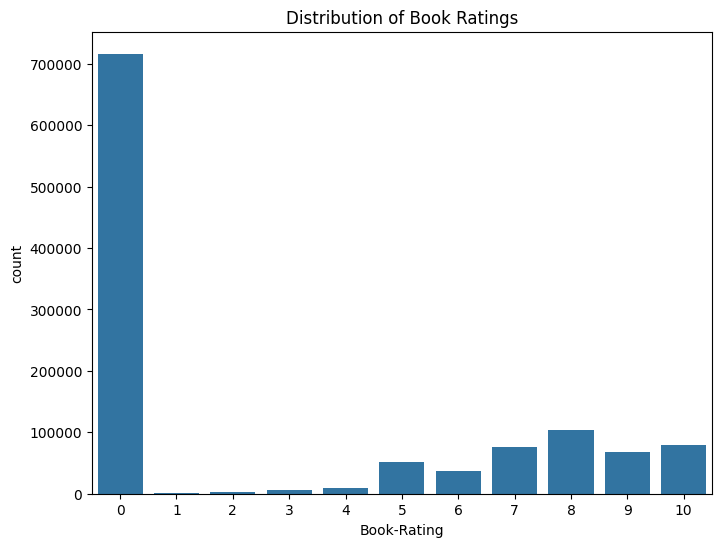

In [615]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ratings, x='Book-Rating')
plt.title('Distribution of Book Ratings')
plt.show()

In [616]:
df_books: DataFrame = pd.read_csv("../unprocessed-data/books.csv", encoding='utf-8', low_memory=False)

df_books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [617]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [618]:
df_books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [619]:
df_books["Book-Author"] = df_books['Book-Author'].fillna('Unknown Author')
df_books["Publisher"] = df_books['Publisher'].fillna('Unknown Publisher')

In [620]:
df_books['Year-Of-Publication'] = pd.to_numeric(df_books['Year-Of-Publication'], errors='coerce')

In [621]:
df_books.isna().sum()
df_books: DataFrame = df_books.dropna(subset=['Year-Of-Publication'])

In [622]:
df_users: DataFrame = pd.read_csv("../unprocessed-data/users.csv")

df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [623]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [624]:
df_users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [625]:
df_users: DataFrame = df_users.drop(columns="Age")

In [626]:
df_users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [627]:
df_books_rating: DataFrame = pd.merge(df_ratings, df_books, on="ISBN", how="inner")

df_books_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [628]:
df_books_rating.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"], inplace=True)

In [629]:
df_books_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press


In [630]:
df_books_rating.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [631]:
ratings_per_book = df_books_rating.groupby('Book-Title')['Book-Rating'].count().reset_index()
ratings_per_book.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
ratings_per_book

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241063,Ã?Â?lpiraten.,2
241064,Ã?Â?rger mit Produkt X. Roman.,4
241065,Ã?Â?sterlich leben.,1
241066,Ã?Â?stlich der Berge.,3


In [632]:
ratings_with_num_ratings: DataFrame = ratings_per_book.merge(df_books_rating, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
ratings_with_num_ratings

,Book-Title,num_ratings,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher
0,A Light in the Storm: The Civil War Diary of ...,4,18995,0590567330,0,Karen Hesse,1999.0,Hyperion Books for Children
1,A Light in the Storm: The Civil War Diary of ...,4,35859,0590567330,0,Karen Hesse,1999.0,Hyperion Books for Children
2,A Light in the Storm: The Civil War Diary of ...,4,55927,0590567330,0,Karen Hesse,1999.0,Hyperion Books for Children
3,A Light in the Storm: The Civil War Diary of ...,4,96448,0590567330,9,Karen Hesse,1999.0,Hyperion Books for Children
4,Always Have Popsicles,1,172742,0964147726,0,Rebecca Harvin,1994.0,Rebecca L. Harvin
...,...,...,...,...,...,...,...,...
1031127,Ã?Â?stlich der Berge.,3,90839,3442725739,8,David Guterson,2000.0,btb
1031128,Ã?Â?stlich der Berge.,3,243548,3442725739,0,David Guterson,2000.0,btb
1031129,Ã?Â?stlich der Berge.,3,261105,3442725739,0,David Guterson,2000.0,btb
1031130,Ã?Â?thique en toc,2,25436,2842192508,8,Didier Daeninckx,1998.0,Baleine


In [633]:
popularity_threshold = 100
rating_popular_book: DataFrame= ratings_with_num_ratings.query('num_ratings >= @popularity_threshold')

rating_popular_book

,Book-Title,num_ratings,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher
2072,1984,284,278158,0451524934,0,George Orwell,1990.0,Signet Book
2073,1984,284,278796,0451519841,0,George Orwell,1980.0,New Amer Library
2074,1984,284,254,0451524934,9,George Orwell,1990.0,Signet Book
2075,1984,284,1706,0451524934,10,George Orwell,1990.0,Signet Book
2076,1984,284,2179,0451524934,8,George Orwell,1990.0,Signet Book
...,...,...,...,...,...,...,...,...
1030495,"\O\"" Is for Outlaw""",269,269728,0449003787,0,SUE GRAFTON,2001.0,Ballantine Books
1030496,"\O\"" Is for Outlaw""",269,271410,0449003787,0,SUE GRAFTON,2001.0,Ballantine Books
1030497,"\O\"" Is for Outlaw""",269,274301,0449003787,8,SUE GRAFTON,2001.0,Ballantine Books
1030498,"\O\"" Is for Outlaw""",269,274325,0449003787,9,SUE GRAFTON,2001.0,Ballantine Books


### Dataframe final

In [634]:
final_df: DataFrame=rating_popular_book.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating').fillna(0)
final_df.shape

(914, 38132)

In [635]:
Path.mkdir("../processed-data", exist_ok=True)
final_df.to_csv("../processed-data/final_df.csv", encoding='utf-8')